## KNN
For regression problem, the k-nearest neighbor prediction is defined as:
\begin{aligned}
    \hat Y(x) = \sum_{x_i\in N_k(x)}\omega_i y_i,
\end{aligned}
where $N_k(x)$ is the neighborhood of x defined by the k closest points $x_i$ in the training samples, and $\sum_{x_i\in N_k(x)}\omega_i = 1$.

Let $\omega_i = \frac{1}{k}$, we have:
\begin{aligned}
    \hat Y(x) = \frac{1}{k}\sum_{x_i\in N_k(x)}y_i.
\end{aligned}

For classification problem, we can utilize the voting mechanism to conduct prediction, which can be formulated as:
$$
G_j(x) = \sum_{x_i\in N_k(x)}I(y_i=j),
$$

$$
\hat Y(x) = \mathop{\arg\max}_j G_j(x),
$$
where $I()$ is an indicator function which returns 1 if the statement is true and returns 0 otherwise.

<img src="./knn/1.png" weight=640 height=320 />
<img src="./knn/2.png" weight=640 height=320 />
<img src="./knn/3.png" weight=640 height=320 />

## Datasets

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 

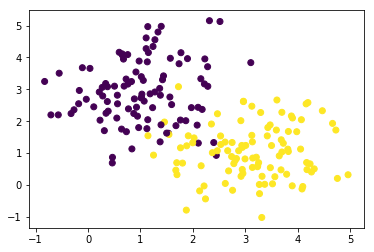

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# load data
path = '/kaggle/input/'
# mnist or gauss
m_x = np.loadtxt(fname='%s_x'%(path+'mnist'), delimiter=' ')
m_y = np.loadtxt(fname='%s_y'%(path+'mnist'), delimiter=' ')
g_x = np.loadtxt(fname='%s_x'%(path+'gauss'), delimiter=' ')
g_y = np.loadtxt(fname='%s_y'%(path+'gauss'), delimiter=' ')

# show data
## mnist
data = np.reshape(np.array(m_x[0], dtype=int), [28, 28])
print(data)

## gauss
plt.scatter(g_x[:, 0], g_x[:, 1], c=g_y)
plt.show()

In [2]:
# split data
thredhold = int(len(m_x) * 0.8)
train_data = {'x': m_x[:thredhold], 'y': m_y[:thredhold]}
test_data = {'x': m_x[thredhold:], 'y': m_y[thredhold:]}

## Implementation

In [3]:
class KNN():
    def __init__(self, k, label_num):
        self.k = k
        self.label_num = label_num

    def fit(self, train_data):
        self.train_data = train_data
        # from scipy import spatial
        # self.kdtree = spatial.KDTree(data=self.train_data['x'])#

    def predict(self, test_x):
        predicted_test_labels = np.zeros(shape=[len(test_x)], dtype=int)
        for x, i in zip(test_x, np.arange(len(test_x))):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels

    def get_label(self, x):
        knn_indexes = self.get_knn_indexes(x)
        label_statistic = np.zeros(shape=[self.label_num])
        for index in knn_indexes:
            label = int(self.train_data['y'][index])
            label_statistic[label] += 1
        return np.argmax(label_statistic)

    def get_knn_indexes(self, x):
        # return self.kdtree.query(x, k=self.k)[1]
        dis = list(map(lambda a: self.distance(a, x), self.train_data['x']))
        knn_pairs = sorted(zip(dis, np.arange(len(dis))), key=lambda x: x[0])[:self.k]
        knn_indexes = [p[1] for p in knn_pairs]
        return knn_indexes

    def distance(self, a, b):
        return np.sqrt(np.sum(np.square(a-b)))

In [4]:
for k in range(1, 10):
    # fit knn
    knn = KNN(k, label_num=10)
    knn.fit(train_data)
    predicted_labels = knn.predict(test_data['x'])

    # evaluate
    accuracy = np.mean(np.equal(predicted_labels, test_data['y']))
    print('k: %2d, accuracy: %.3f' % (k, accuracy))

k:  1, accuracy: 0.875
k:  2, accuracy: 0.875
k:  3, accuracy: 0.870
k:  4, accuracy: 0.885
k:  5, accuracy: 0.865
k:  6, accuracy: 0.880
k:  7, accuracy: 0.885
k:  8, accuracy: 0.875
k:  9, accuracy: 0.870


## KNN in scikit-learn

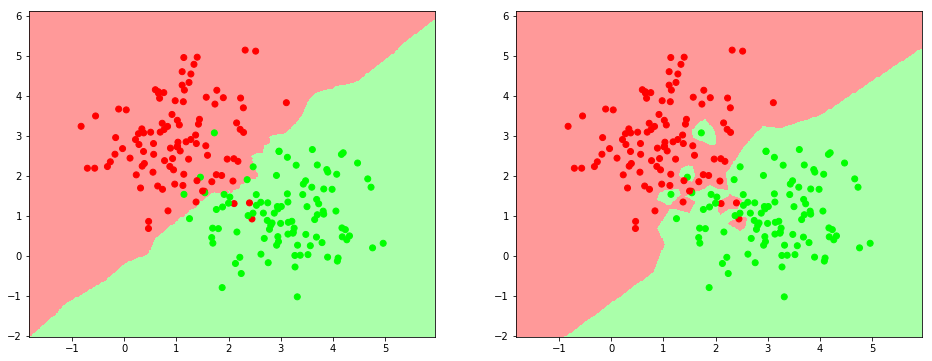

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

x = g_x
y = g_y

step = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.c_[xx.ravel(), yy.ravel()]

knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(x, y)
z1 = knn1.predict(grid_data)

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(x, y)
z2 = knn2.predict(grid_data)

cmap_light = ListedColormap(['#FF9999', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pcolormesh(xx, yy, z1.reshape(xx.shape), cmap=cmap_light)
ax1.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
ax2.pcolormesh(xx, yy, z2.reshape(xx.shape), cmap=cmap_light)
ax2.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
plt.show()

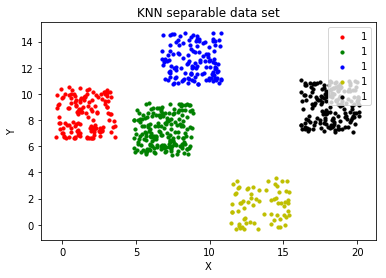

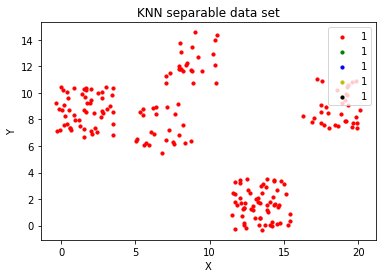

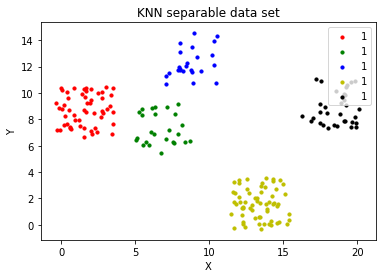

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#模拟生成分类数据
#目标是产生二维坐标中的几堆数据集，每堆为一个类
#函数逻辑：
#将x轴分段，每个段设一个中心的，所有的中心点用cores存储。
#设置每个数据中心点core的类别，由中心点在一定范围内随机产生数据，并将这些数据设为和core一样的类别
#所以每类的数据会简单的被X轴的每段大致分开

def makeKNNData(colnum,clsnum,nums,cores = []):
#colnum单个数据拥有特征数量（包括数据的分类）；
# clsnum表示共有多少种分类；
# nums是一个元组，表示每个类别希望产生多少数据样本；
#cores非必要参数，手动给出只是用于测试，cores提供每类的中心点，以中心点为依据产生该类数据。

    dataSet = np.zeros((sum(nums),colnum))   #初始化数据集，用于存放随后生成的所有数据
    n=0   #记录生成数据的下标
    step = 20/clsnum      #假定X坐标轴只显示0~20的范围，step为X轴分段后的段长
    for j in range(clsnum):     #循环生成各个类数据
        try:
            core = cores[j]      #如果cores没有给出则，则出错，跳至except执行
        except IndexError :
            core = np.random.rand(1,3)      #中心点为array([[x1,x2,c]])，c用于表示类别，这里产生的是1*3的二维数组
            core[0][0] =j*step + core[0][0]*step  #将x1限制在各段中
            core[0][1] *=15       #将x2即y轴限制在0~15范围内
            core[0][2] = j    #设置类别
            cores.append(core)
        for i in range(nums[j]):   #按nums中指定了每类数据的数量，用循环生成。
            point= core[0][:2] + np.random.rand(1,2)*step -step/2   #产生点point（x,y)，x以中心点在（core_x - step/2, core_x + step/2)范围随机波动，y同理。
            row = np.column_stack((point,core[0][2]))   #加上类别成为一个数据
            dataSet[n] = row
            n +=1
            i +=1

        j +=1

    #print("print cores:",cores)
    return dataSet

#绘图展示数据，每类数据点以不同的颜色显示
def showFigure(dataSet,clsnum):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)   #界面只需显示一个视图
    ax.set_title('KNN separable data set')  #视图名称，这里简单统一定这个名称吧
    plt.xlabel('X')    #坐标轴名称
    plt.ylabel('Y')

    colors = ['r','g','b','y','k']   #定义显示的颜色b为blue，k为black
    for i in range(clsnum):
        idx = np.where(dataSet[:,2] == i)  #查询每类的索引号
        ax.scatter(dataSet[idx,0], dataSet[idx,1], marker='o', color=colors[i%5], label=1, s=10)  #在视图中的显示方式

    plt.legend(loc = 'upper right')   #图例显示位置
    plt.show()


#分类算法：
#待分类数据iData,先计算其到已标记数据集中每个数据的距离
#然后根据离iData最近的k个数据的分类，出现次数最多的类别定为iData的分类。

def KNNClassify(labelData,predData,k):  #数据集包含分类属性
#labelData 是已经标记分类的数据集
#predData 待预测数据集
    labShape = labelData.shape
    for i in range(predData.shape[0]): #以predData的每行数据进行遍历
        iData = predData[i]
        iDset = np.tile(iData,(labShape[0],1))   #将iData重复，扩展成与labelData同形的矩阵  为计算每一个待预测点与以分类点的距离
        #这里用欧拉距离sqrt((x1-x2)^2+(y1-y2)^2)
        diff = iDset[...,:-1] - labelData[...,:-1]
        diff = diff**2
        distance = np.sum(diff,axis=1)
        distance = distance ** 0.5  #开根号
        sortedIND = np.argsort(distance)   #排序，以序号返回。
        classCount = { }
        for j in range(k):  #计算距离最近的前k个标记数据的类别
            voteLabel = labelData[sortedIND[j],-1]
            classCount[voteLabel] = classCount.get(voteLabel,0)+1

        maxcls = max(classCount,key=classCount.get)   #类别最多的，返回键名（类别名）
        predData[i][...,-1] =  maxcls

    return predData

#测试
classnum = 5
labNums = np.random.randint(50,200,classnum)
predNums = np.random.randint(10,80,classnum)
#cores = [np.array([[ 0.08321641, 12.22596938,  0.        ]]), np.array([[9.99891798, 4.24009775, 1.        ]]), np.array([[14.98097374,  9.80120399,  2.        ]])]

labelData = makeKNNData(3,classnum,labNums)
showFigure(labelData,classnum)
predData = makeKNNData(3,classnum,predNums)   #这里为了方便，不在写产生待分类数据的代码，只需用之前的函数并忽略其类别就好。
predData[...,-1]=0
showFigure(predData,classnum)

k = 10
KNNData = KNNClassify(labelData,predData,k)
showFigure(KNNData,classnum)
